In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/HR_Employee_Attrition_Dataset (1).xlsx'

Mounted at /content/drive


Comparing performance of Logistic Regression and K Nearest Neighbors Model for predicting if the employee will leave a company.The K Nearest Neighbors model provided better accuracy.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from scipy.stats import chi2_contingency
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

Q1)A)

In [ ]:
df=pd.read_excel(path)
print(df.shape)

(2940, 34)


In [ ]:
print(df.head())

   EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1             

  Q1)B)

In [ ]:
print(df.dtypes)

EmployeeNumber               int64
Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [ ]:
for i in df.columns:
  print(df[i].value_counts())

1       1
1954    1
1956    1
1957    1
1958    1
       ..
982     1
983     1
984     1
985     1
2940    1
Name: EmployeeNumber, Length: 2940, dtype: int64
No     2466
Yes     474
Name: Attrition, dtype: int64
35    156
34    154
36    138
31    138
29    136
32    122
30    120
33    116
38    116
40    114
37    100
27     96
28     96
42     92
39     84
45     82
41     80
26     78
44     66
46     66
43     64
50     60
25     52
24     52
49     48
47     48
55     44
51     38
53     38
48     38
54     36
52     36
22     32
56     28
23     28
58     28
21     26
20     22
59     20
19     18
18     16
60     10
57      8
Name: Age, dtype: int64
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
691     12
408     10
530     10
1329    10
1082    10
        ..
650      2
279      2
316      2
314      2
628      2
Name: DailyRate, Length: 886, dtype: int64
Research & Development    1922
Sales                    

Q1)C)

In [ ]:
print(df.columns)

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
df=df.drop(['EmployeeNumber','MaritalStatus','Over18'],axis=1)
#Dropping EmployeeNumber as it has no use in Model
#Dropping MaritalStatus as it has no relation to Attrition
#Dropping Over18 as it has no unique value as in all the rows have same value so it can be handled in intercept

Q2)A)

In [ ]:
categorical_columns=[]
for i in df.columns:
  if df[i].dtype=='object':
    categorical_columns.append(i)
df_numeric=df.drop(categorical_columns,axis=1)

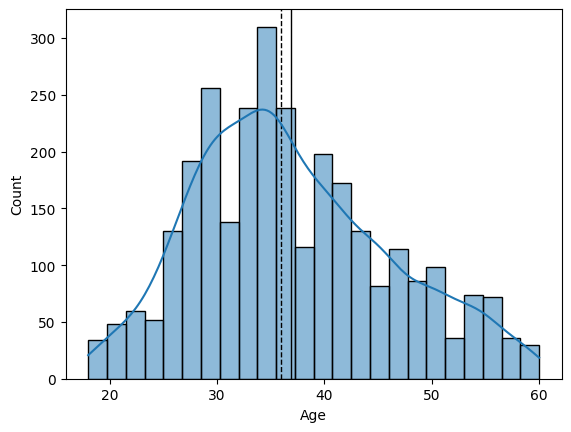

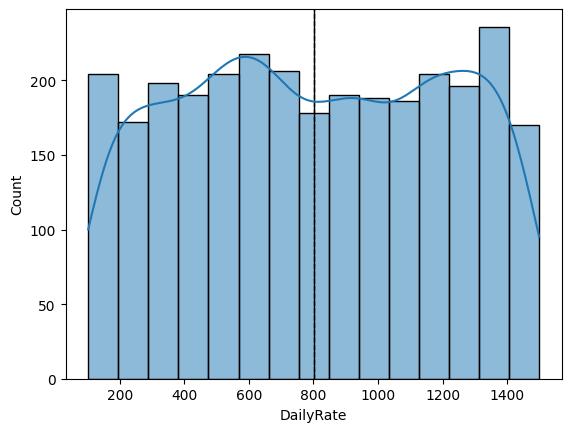

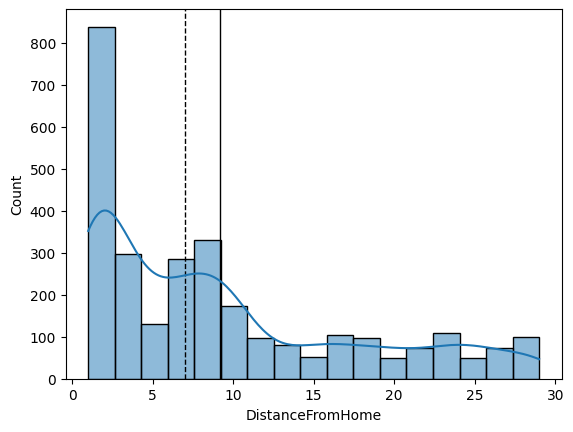

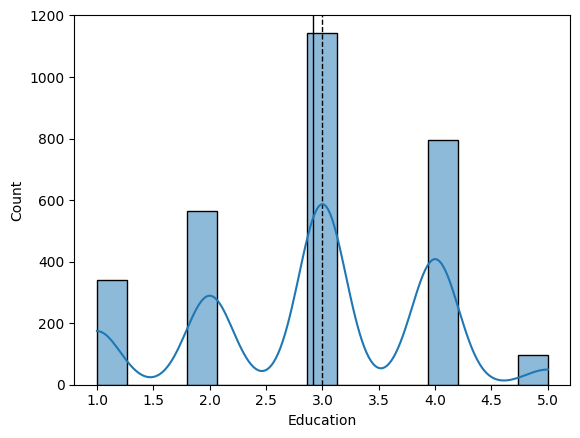

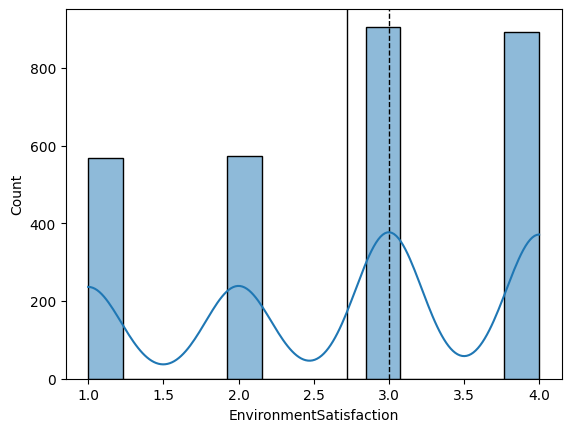

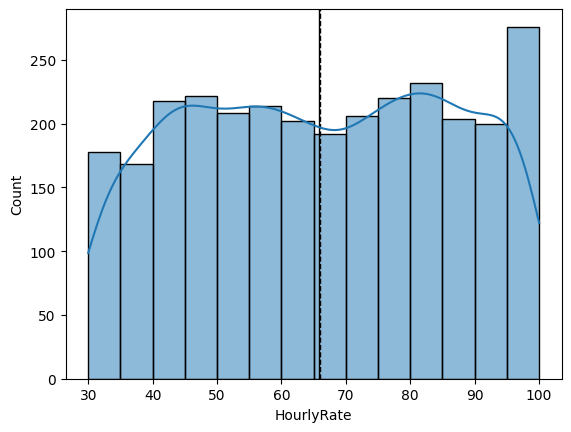

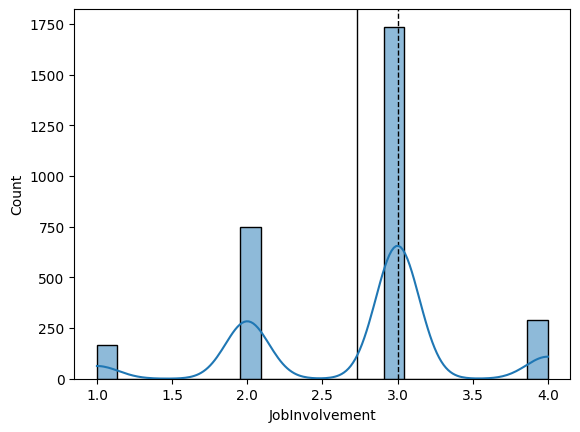

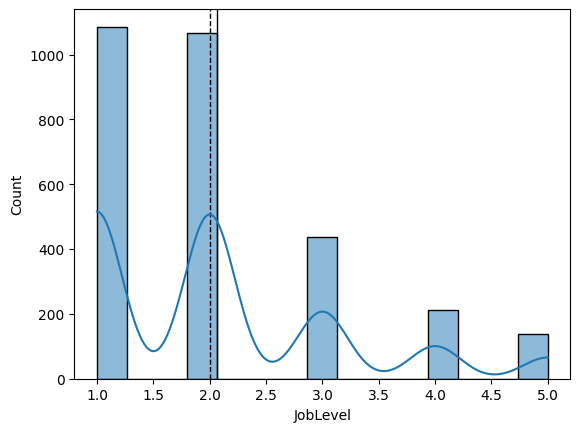

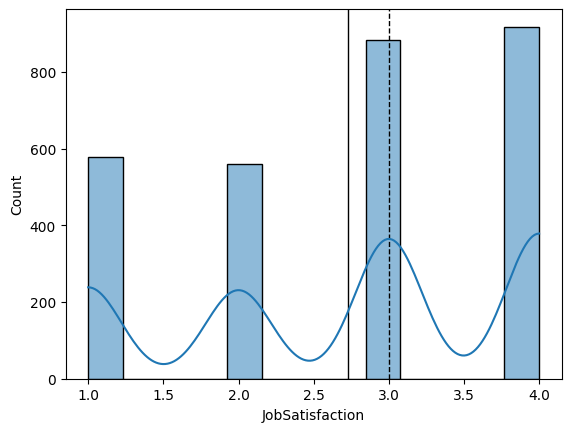

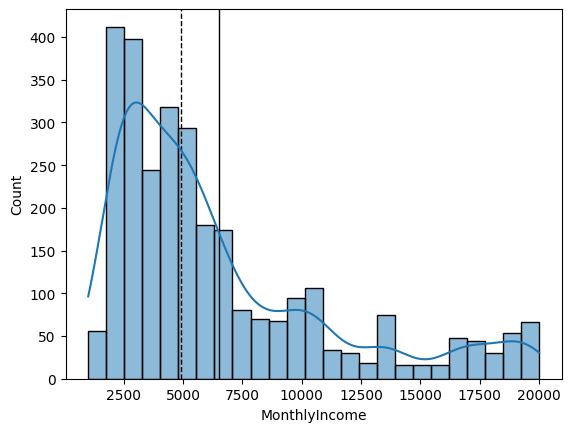

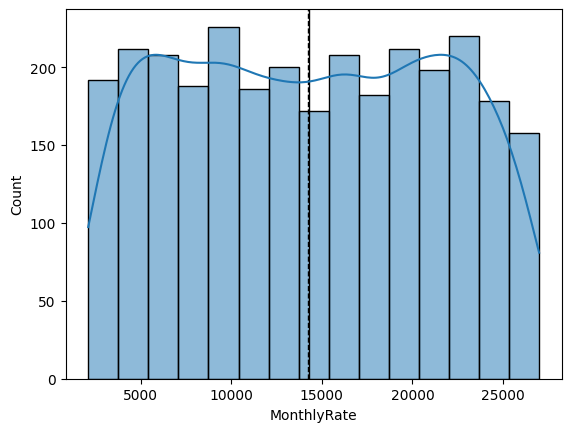

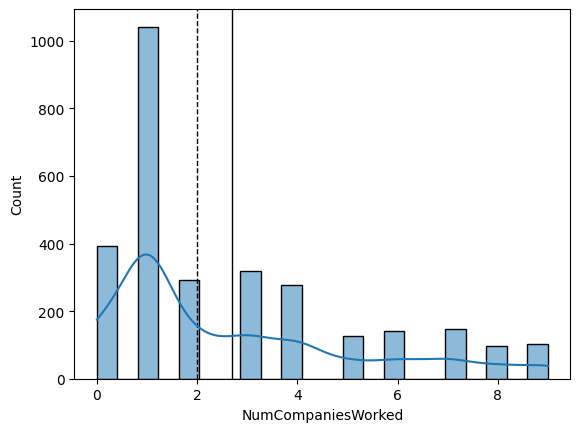

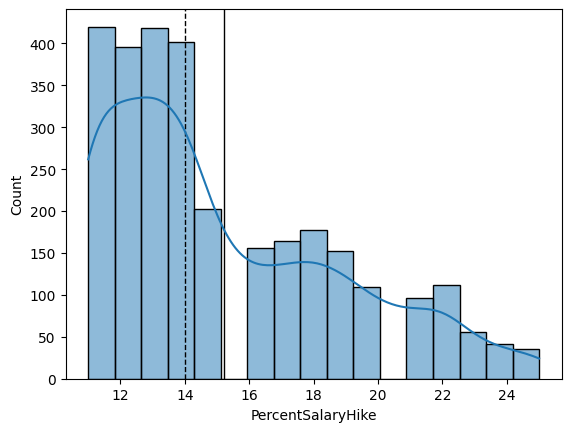

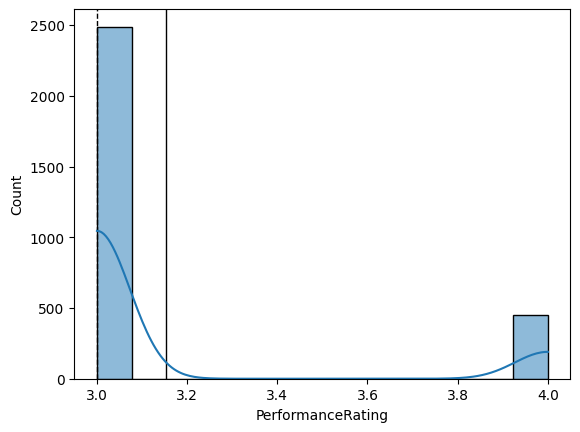

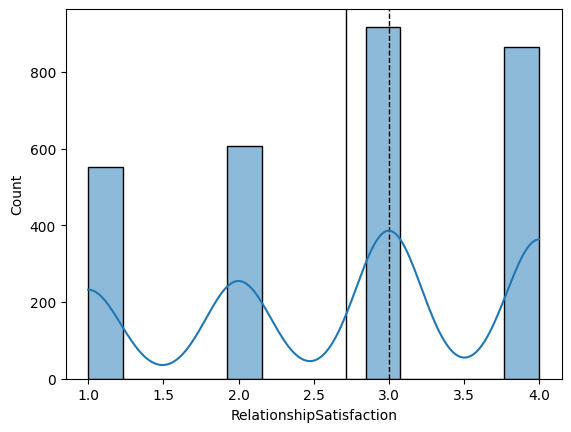

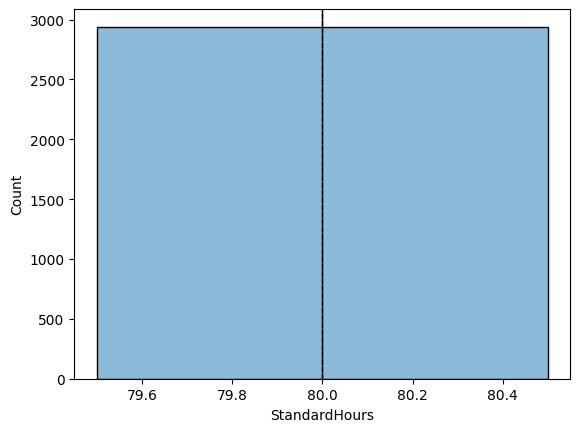

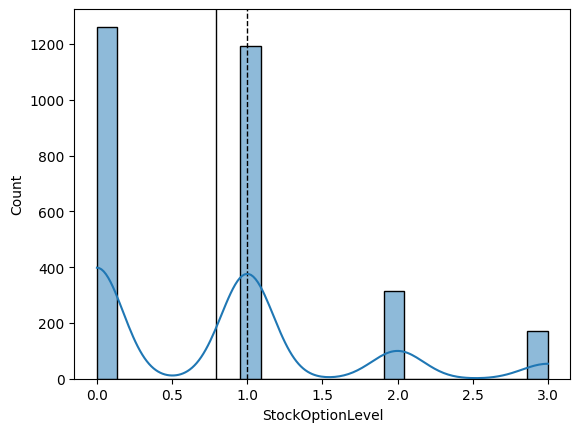

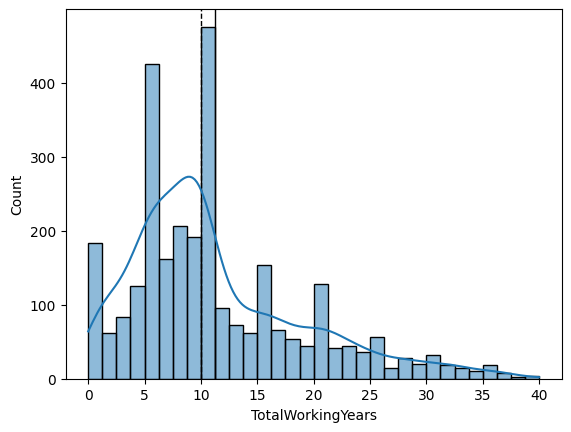

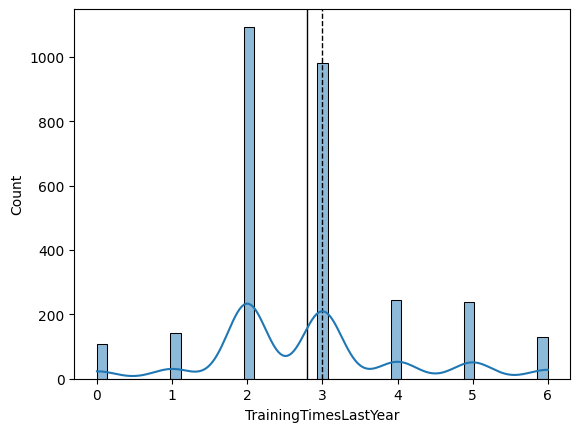

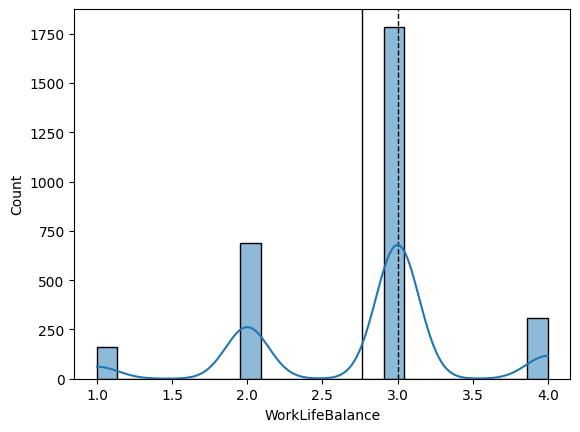

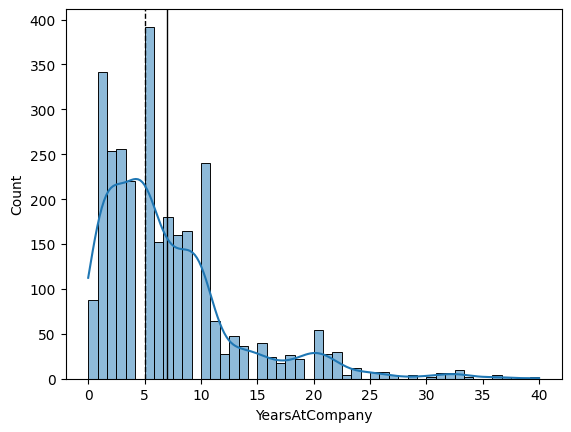

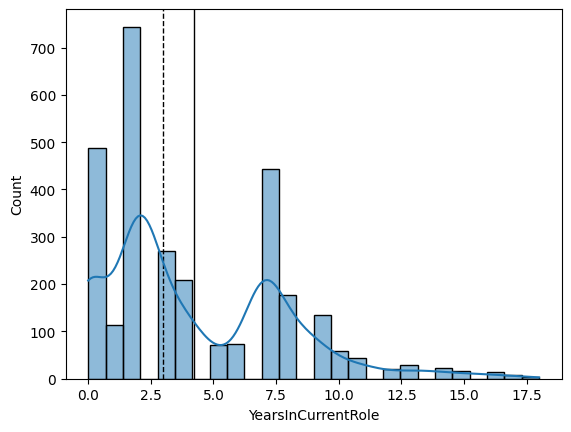

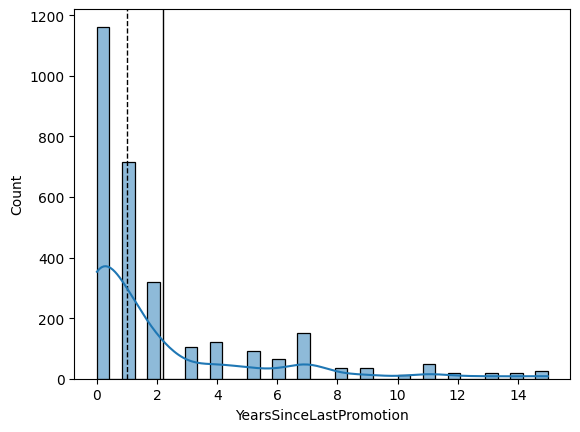

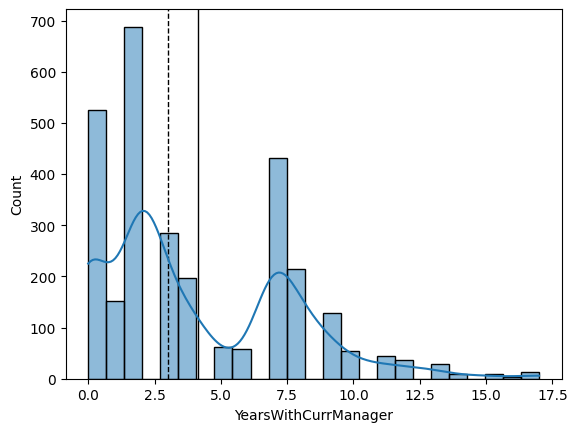

In [ ]:
def visualize_histplot(column_name):
  plt.axvline(df_numeric[column_name].mean(),color='black',linewidth=1)
  plt.axvline(np.median(df_numeric[column_name]),color='black',linestyle='dashed',linewidth=1)
  sns.histplot(data=df_numeric,x=df_numeric[column_name],kde=True)
  plt.show()
for i in df_numeric.columns:
  visualize_histplot(i)

In [ ]:
numeric_columns=[]
for i in df.columns:
  if df[i].dtype!='object':
    numeric_columns.append(i)
df_categorical=df.drop(numeric_columns,axis=1)

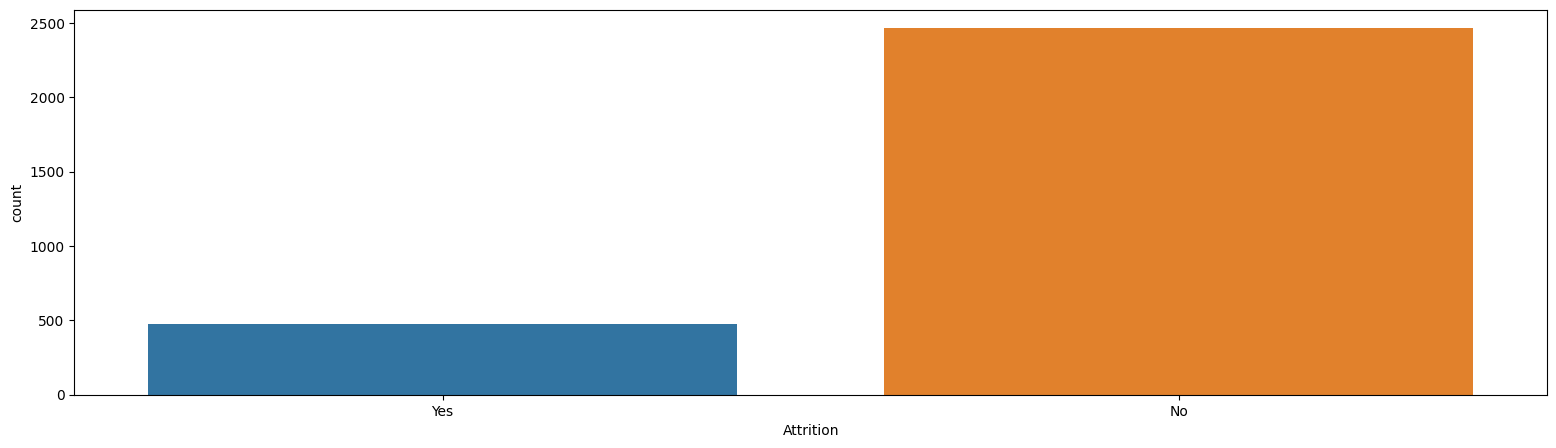

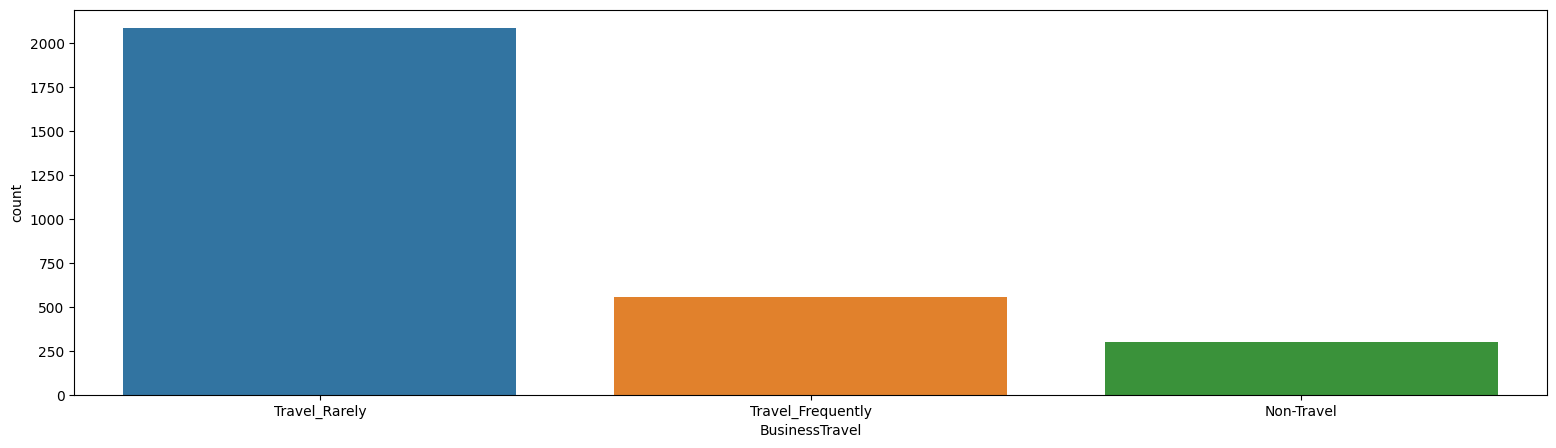

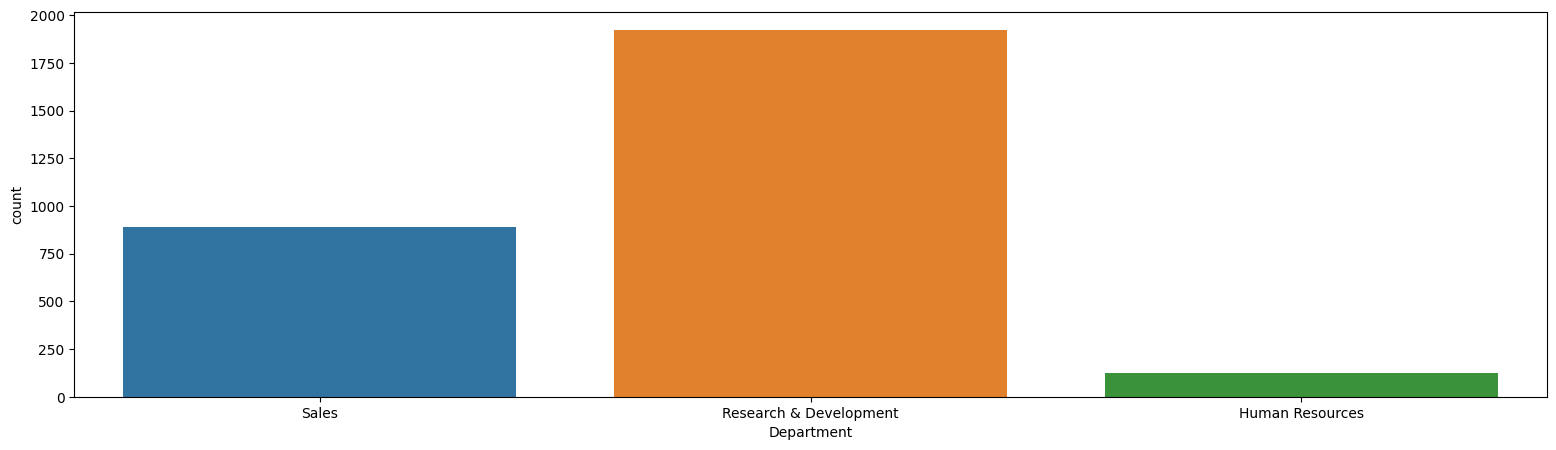

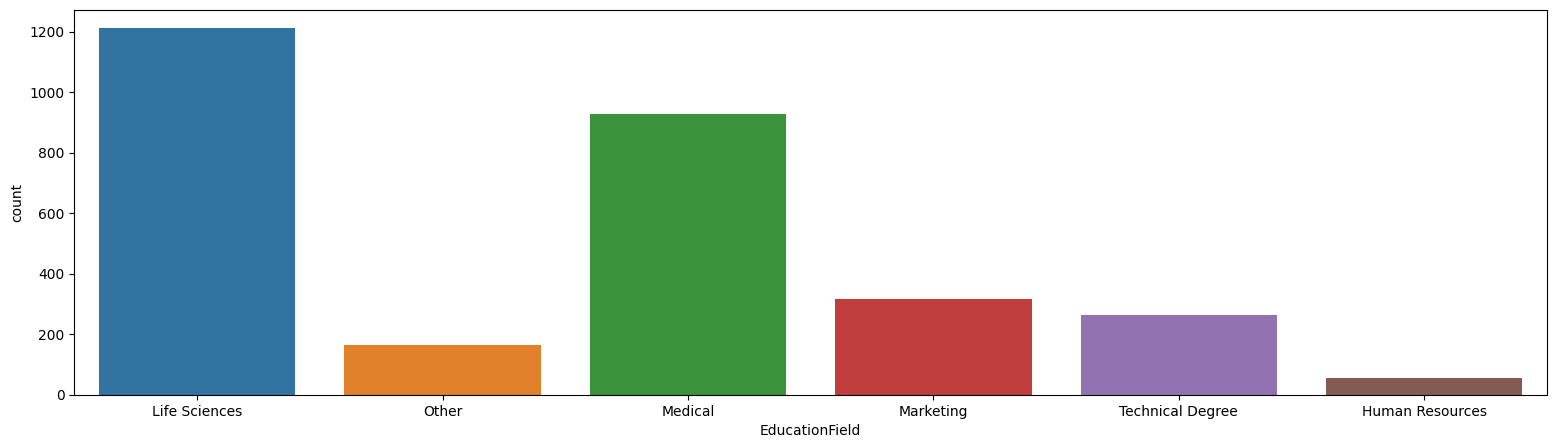

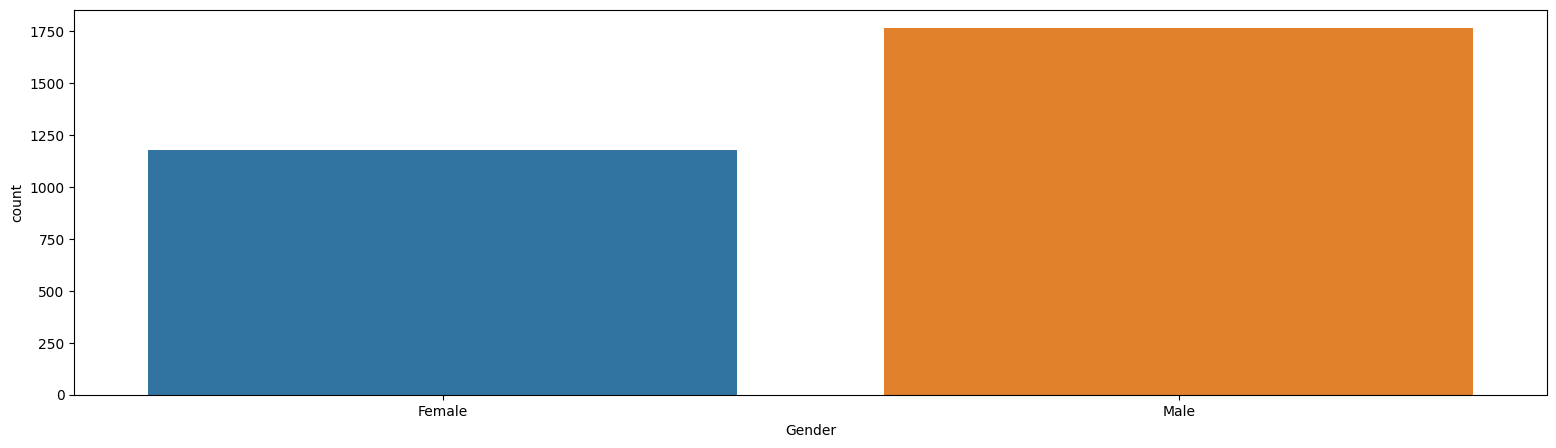

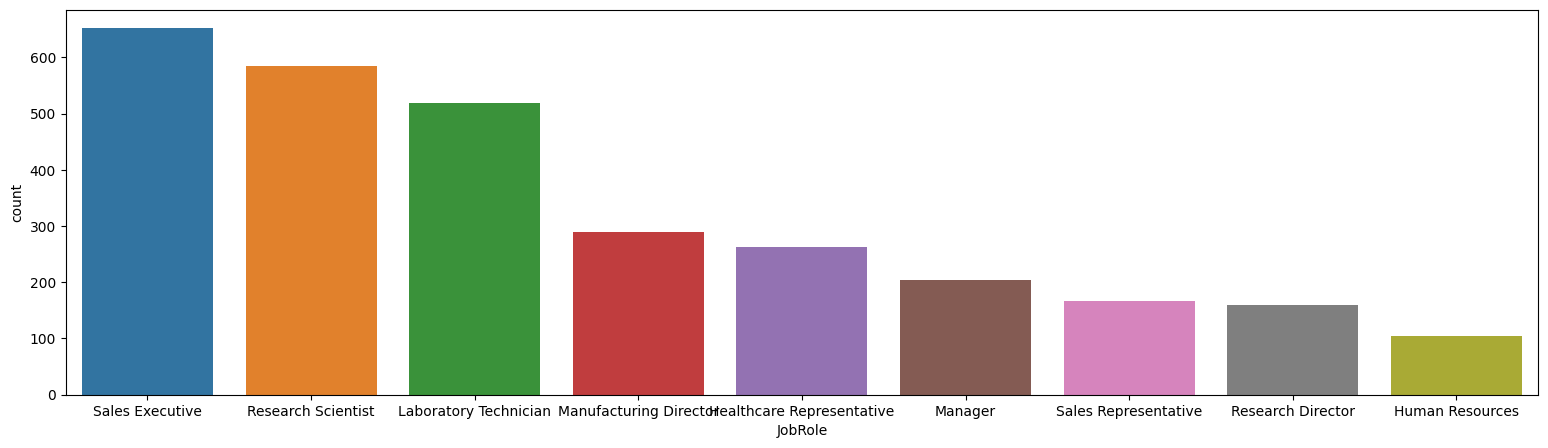

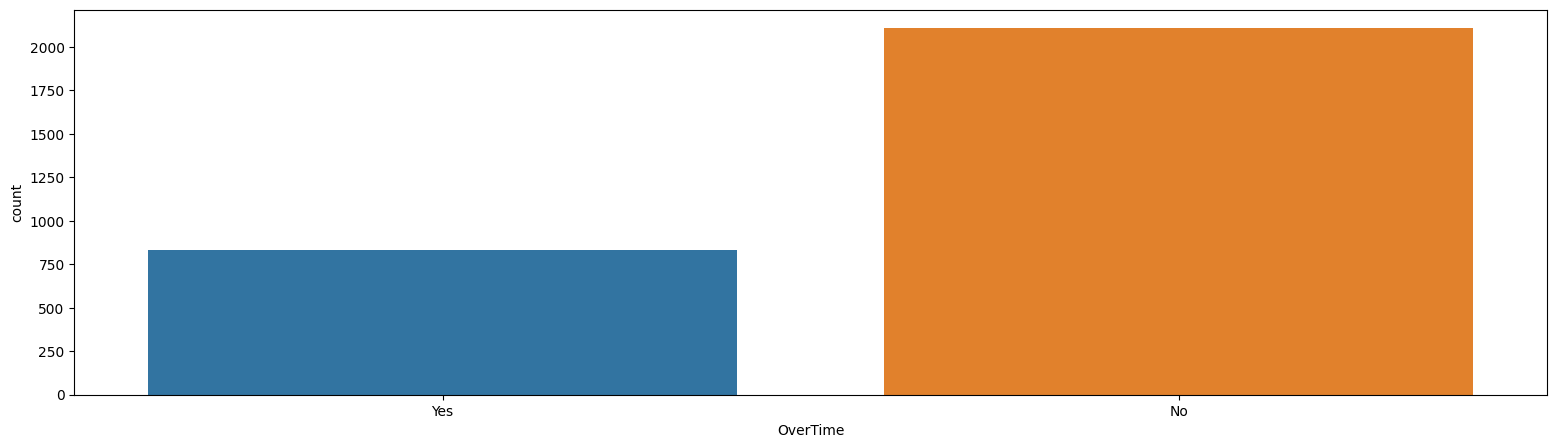

In [ ]:
def visualize_countplot(column_name):
  fig, ax = plt.subplots(figsize=(19, 5))
  sns.countplot(data=df_categorical,x=df_categorical[column_name],ax=ax);
  plt.show()
for i in df_categorical.columns:
  visualize_countplot(i)

Q2)B)

In [ ]:
# g=sns.pairplot(data=df,diag_kind='kde');
# g.fig.set_size_inches(30,30)

Q3)A)

In [ ]:
df['Attrition']=df['Attrition'].map(lambda x:str(x).replace('Yes','1'))
df['Attrition']=df['Attrition'].map(lambda x:str(x).replace('No','0'))
df['Attrition']=df['Attrition'].astype('int')
print(df['Attrition'])

0       1
1       0
2       1
3       0
4       0
       ..
2935    0
2936    0
2937    0
2938    0
2939    0
Name: Attrition, Length: 2940, dtype: int64


In [ ]:
df['OverTime']=df['OverTime'].map(lambda x:str(x).replace('Yes','1'))
df['OverTime']=df['OverTime'].map(lambda x:str(x).replace('No','0'))
df['OverTime']=df['OverTime'].astype('int')
print(df['OverTime'])

0       1
1       0
2       1
3       1
4       0
       ..
2935    0
2936    0
2937    1
2938    0
2939    0
Name: OverTime, Length: 2940, dtype: int64


In [ ]:
df=pd.get_dummies(df)
print(df.head())

   Attrition  Age  DailyRate  DistanceFromHome  Education  \
0          1   41       1102                 1          2   
1          0   49        279                 8          1   
2          1   37       1373                 2          2   
3          0   33       1392                 3          4   
4          0   27        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  ...  Gender_Male  JobRole_Healthcare Representative  \
0                4  ...            0                                  0   
1                2  ...            1                                  0   

In [ ]:
X=df
X=X.drop(['Attrition'],axis=1)
print(X.head())

   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   Gender_Male  JobRole_Healthcare Representative  JobRole_Human Res

In [ ]:
y=df['Attrition']
print(y.head())

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64


Q3)B)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

Q3)C)i)

In [ ]:
model= LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict_train=model.predict(X_train)
print(y_predict_train)

[0 0 0 ... 0 0 0]


In [ ]:
R_Square_training=model.score(X_train,y_train)
print('In Sample R Square: ',R_Square_training)

In Sample R Square:  0.847910592808552


Q3)C)ii)

In [ ]:
model= LogisticRegression()
model.fit(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict_test=model.predict(X_test)
print(y_predict_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
R_Square_testing=model.score(X_test,y_test)
print('Out Sample R Square: ',R_Square_testing)

Out Sample R Square:  0.8231292517006803


Q3)C)iii)

In [ ]:
print(model.coef_)

[[-3.43845129e-02 -5.18405587e-04  2.62385533e-02  3.13415102e-03
  -1.11055590e-02  2.65550030e-03 -6.52309967e-03 -1.88094542e-03
  -1.08637098e-02 -8.77066395e-05 -6.93994808e-07  1.24371867e-02
   1.18612886e-02 -2.41030679e-03  1.04197908e-03 -5.50041984e-03
   6.28946452e-03 -1.09871027e-02 -1.73993730e-02 -5.43573482e-03
  -2.23602691e-03  5.53242593e-04 -9.14705885e-03  2.08362039e-02
  -1.82361221e-02 -1.31976201e-03  2.64453582e-03 -1.24615550e-03
  -3.71460848e-04 -2.63719159e-03  3.08727075e-03  2.79555528e-04
  -1.44090497e-03  1.20435257e-03 -1.57033501e-03 -9.08342980e-04
   2.51429316e-03 -2.10984839e-03  2.18846670e-03 -2.02648962e-03
  -3.28784607e-04  1.61189164e-03  2.86716136e-04 -1.19125558e-03
   6.12517684e-05 -1.49880662e-03  1.41456723e-03  1.74952795e-03]]


Q3)D)i

In [ ]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Q3)D)ii)

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

Q3)D)iii)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 93.60000000000001
Accuracy with k=1 90.4


Q3)E)

In [ ]:
#KNN is a much better model for this dataset than Logistic Regression as it has a higher accuracy score.

Q4)

In [ ]:
#They should go with KNN model as it has a great accuracy score in training and as well as testing